In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter

In [56]:
sungbo = pd.read_csv('./sungbo.csv')

In [57]:
sungbo.columns

Index(['date', 'name', 'sleepingTime', 'quality', 'dinnerTime', 'dinnerMenu',
       'phone', 'phoneTime', 'nap', 'stress', 'alcohol', 'coffee', 'caffein',
       'exTime', 'exIntensity', 'tired', 'alarm', 'alarmNum', 'nextNap',
       'sleepy'],
      dtype='object')

In [58]:
sungbo.dtypes

date             object
name             object
sleepingTime      int64
quality           int64
dinnerTime        int64
dinnerMenu      float64
phone             int64
phoneTime         int64
nap               int64
stress            int64
alcohol           int64
coffee            int64
caffein           int64
exTime            int64
exIntensity     float64
tired             int64
alarm             int64
alarmNum          int64
nextNap           int64
sleepy            int64
dtype: object

# 수면시간의 범위

In [59]:
sungbo['sleepingTime'].max() - sungbo['sleepingTime'].min()

639

In [60]:
sungbo["sleepingTime"].quantile(0.75) - sungbo["sleepingTime"].quantile(0.25)

197.25

# 수면시간과 피로도의 box whisker plot

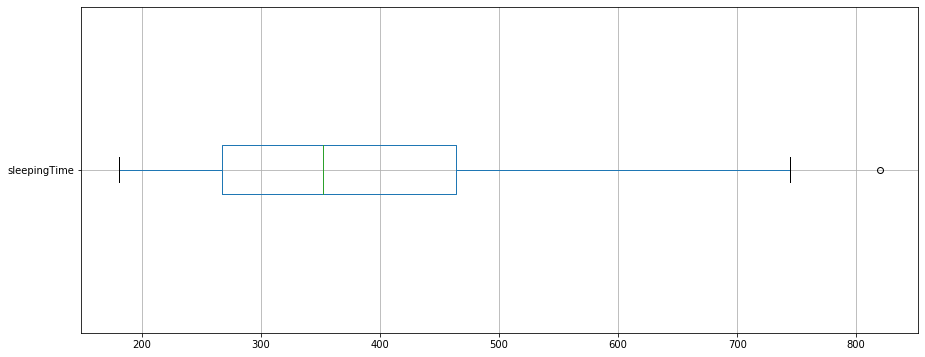

In [61]:
boxplot = sungbo.boxplot(column=['sleepingTime'], figsize=(15,6), vert=False)

In [64]:
boxplot.get_figure().savefig('sungbo box.png')

# 요인들간의 상관관계

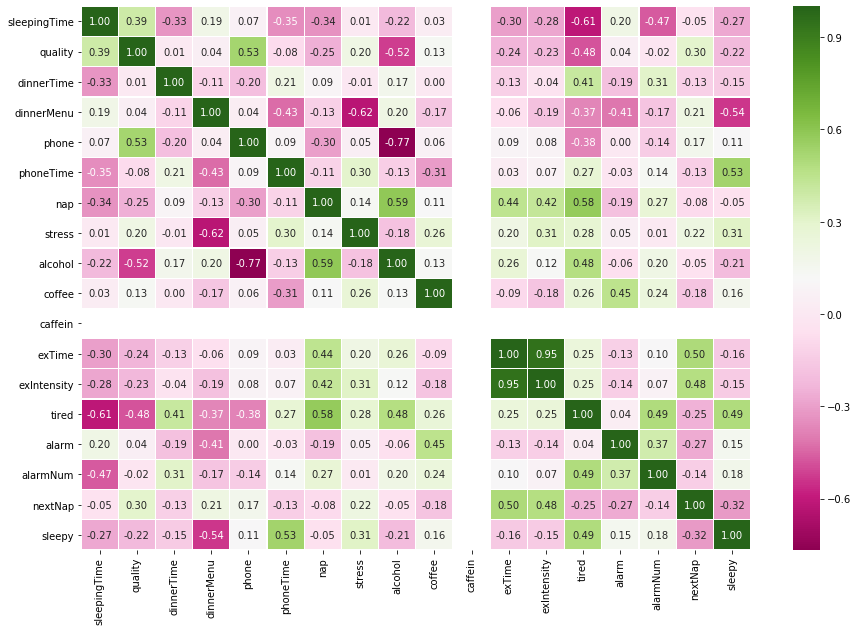

In [65]:
plt.figure(figsize=(15, 10))
plot = sns.heatmap(sungbo.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')
plt.show()

### positive relation
quality, tired, sleepy, nextnap
1. (0.53) 휴대폰 사용 시간, 수면의질: 휴대폰 사용시간이 길수록 수면의 질이 높음
2. (0.41) 저녁식사시간, 피로도: 저녁을 먹고 많은 시간이 지나 잠에 들 수록 다음날 피로도가 낮아짐
3. (0.58) 낮잠 여부, 피로도: 낮잠을 자면 피로도가 낮음
4. (0.48) 알코올 강도, 피로도: 알코올 섭취량이 많을수록 다음날 피로함
5. <b>(0.49) 알람갯수, 피로도: 피로할수록 알람갯수가 많아짐</b>
6. (0.49) 졸음, 피로도: 피로도가 높을수록 더더욱 졸음이 온다
7. <b>(0.5) 운동, 다음날 낮잠: 전날 운동을 하면 다음날 낮잠을 잔다</b>
8. <b>(0.53) 휴대폰 사용 시간, 졸음: 휴대폰을 많이 사용한 다음날은 졸음이 온다</b>

### negative relation
1. (-0.52) 알코올 강도, 수면의 질: 술을 안먹을수록 수면의 질이 좋음
2. (-0.48) 피로도, 수면의 질: 수면의 질이 높을수록 다음날 피로도가 낮아짐  
3. <b>(-0.61) 수면시간, 피로도: 수면시간이 길 수록 다음날 피로도가 낮아짐</b>
4. (-0.54) 저녁 강도, 졸음: 전날 저녁 강도가 약할수록 다음날 졸리다
5. <b>(-0.62) 스트레스 강도, 저녁 강도: 스트레스를 많이받을수록 저녁강도가 낮음</b>
6. (-0.77) 휴대폰 사용 시간, 알코올 강도: 알코올 섭취량이 많을수록 자기전 휴대폰 사용시간이 적다

In [66]:
plot.get_figure().savefig('sungbo heatmap.png') 

In [67]:
import sklearn.datasets as datasets
y=sungbo['tired']

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [69]:
data = sungbo.drop(columns=['name', 'date'])

In [70]:
data = data.fillna(2)

In [71]:
dtree.fit(data,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [73]:
dot_data = StringIO()
tree = export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=['sleepingTime', 'quality', 'dinnerTime', 'dinnerMenu', 'phone', 'phoneTime', 'nap', 'stress', 'alcohol', 'coffee', 'caffein', 'exTime', 'exIntensity', 'tired', 'alarm', 'alarmNum', 'nextNap', 'sleepy'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


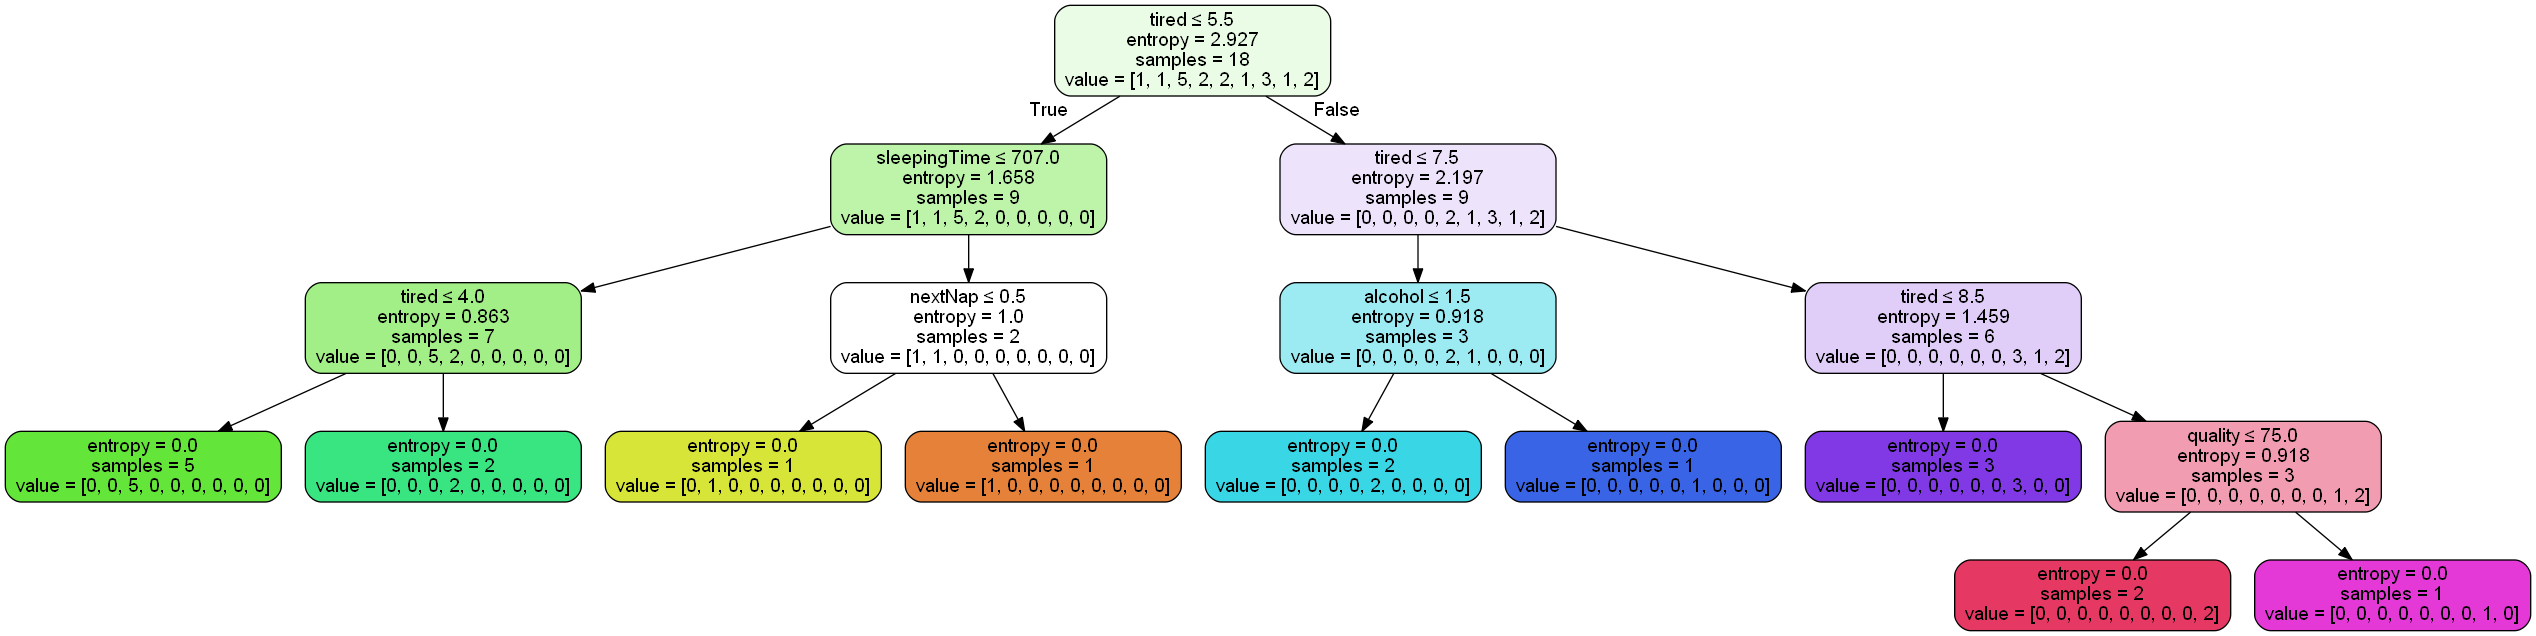

In [74]:
Image(graph.create_png())

In [75]:
graph.write_png("sungbo tree.png")

True